In [87]:
import numpy as np 
from ampl_tools import R_generate_network 

circ = R_generate_network(6,8)
num_CX = dict(circ.decompose(reps=4).count_ops())["cx"]
num_gates = num_CX + dict(circ.decompose(reps=4).count_ops())["u"]

weights = np.load("ampl_outputs/weights_6_8_800_x76_MSE_40_168_.npy")

len(weights)

num_CX

168

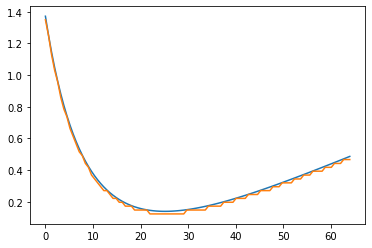

In [14]:
"""
DO NOT DELETE THIS !!!

"""

from tools import psi, bin_to_dec, dec_to_bin 
import numpy as np 
import matplotlib.pyplot as plt 

m =8

x = np.linspace(0,2**6,100)
y = np.array([psi(i) for i in x])

y_reduced = np.modf(y / (2* np.pi))[0] 
y_reduced_bin = [dec_to_bin(i,m, "unsigned mag", 0) for i in y_reduced]
y_reduced_dec =  np.array([bin_to_dec(i,"unsigned mag", 0) for i in y_reduced_bin])

y_rounded = 2 * np.pi * y_reduced_dec

plt.plot(x,y)
plt.plot(x,y_rounded)
plt.show()

"""
DO NOT DELETE THIS !!!

"""